In [ ]:
import torch
from torch import nn ## the neural networks
import matplotlib.pyplot as plt

### ***1 :Data preparing***

#### **a**:creating known data from linear regression

In [ ]:
start = 0
end = 1
step = 0.02
weight = 0.7
bias = 0.3
X = torch.arange(start = start , end = end , step = step).unsqueeze(dim = 1)
y = weight * X + bias

print(f"X 3 elemnts {X[:4]}\ny3 elemnts {y[:3]}")

X 3 elemnts tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600]])
y3 elemnts tensor([[0.3000],
        [0.3140],
        [0.3280]])


**b**:splitting the data into test and train

In [ ]:
train_size = int(0.8 * len(X))
print(train_size)
X_train , y_train = X[:train_size] , y[:train_size]
X_test , y_test = X[train_size:] , y[train_size:]

print(len(X_test))



40
10


In [ ]:
print(X_train.shape)

torch.Size([40, 1])


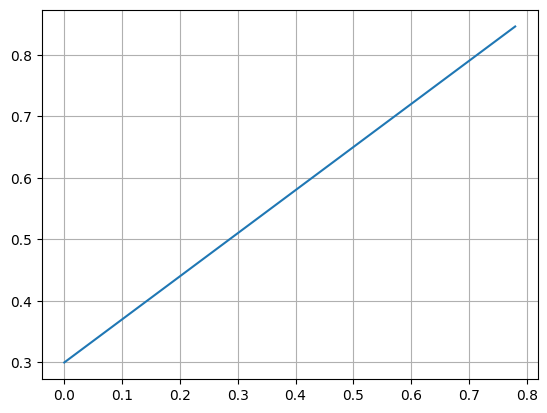

In [ ]:
plt.figure()
plt.plot(X_train.reshape(len(X_train)) , y_train.reshape(len(y_train)))
plt.grid(True)
plt.show()


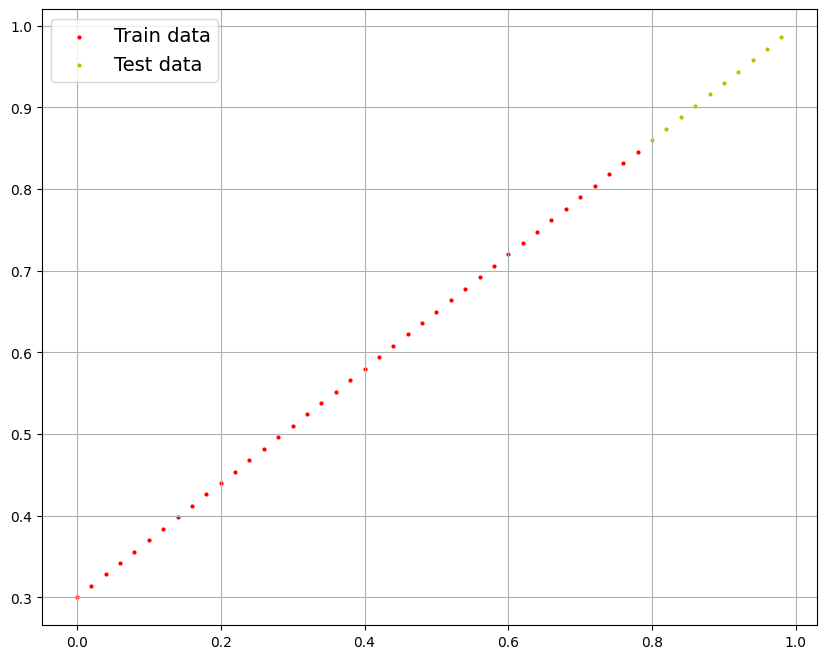

In [ ]:
### method 2

def plot_data(train_data= None , test_data=None , prediction_data = None):
  """
  Plots data if data is prvided
  """
  plt.figure(figsize= (10 , 8))
  plt.grid(True)
  if train_data != None:
    X_train , y_train = train_data
    plt.scatter(X_train , y_train , c='r' , s= 4 , label = "Train data")

  if test_data != None:
    X_test , y_test = test_data
    plt.scatter(X_test , y_test , c='y' , s= 4 , label = "Test data")

  if prediction_data != None:
    X_test , y_pred = prediction_data
    plt.scatter(X_test , y_pred , c='g' , s= 4 , label = "Prediction data")

  plt.legend(prop={"size":14})

plot_data((X_train , y_train) , (X_test , y_test) )





### **2. Building  Model**

#### Time stamp 5:10

In [ ]:
## Biulding the leinear regression model
### If you subclass the nn.module , redefine the foward method
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad = True,
                                              dtype = torch.float32))

    self.bias = nn.Parameter (torch.randn(1,
                                           requires_grad = True,
                                           dtype = torch.float32 ))

  def forward(self , x:torch.Tensor ) -> torch.tensor:

      # return self.weights**2 + self.weights*3 +self.bias
      return self.weights * x + self.bias



### cheking the contents of pytorch model

In [ ]:
## we need to create the random seed
torch.manual_seed (42)

model_0 = LinearRegressionModel()

#### list parameters
print(list(model_0.parameters()))


[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
#### named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##### Making prediction using  ***`torch.inference_mode()`***

In [ ]:
### making predictions

with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

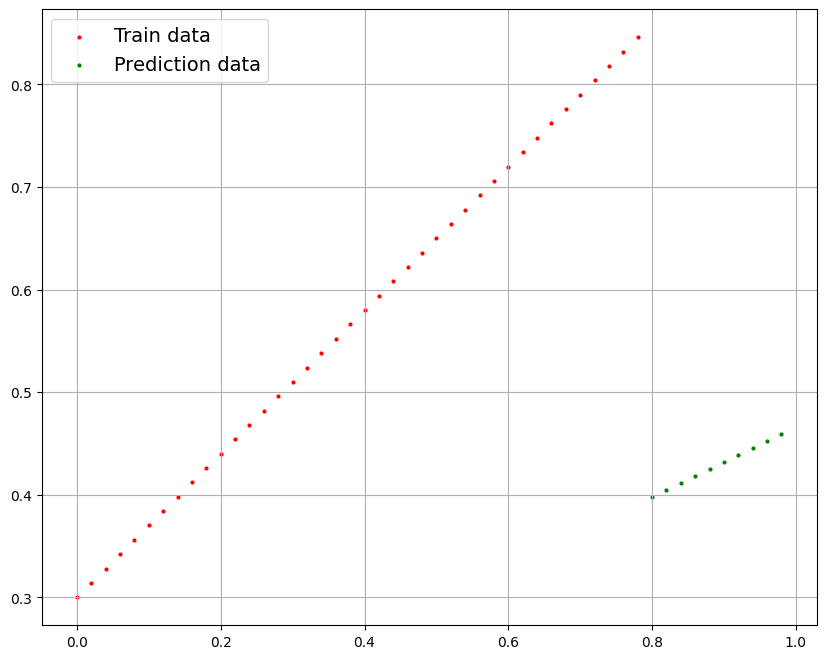

In [ ]:
plot_data((X_train , y_train) ,prediction_data= (X_test , y_pred))

#### ***3:Training the model***

***Requirments***
* Loss function
* Optimizer

In pytorch wee need the training loop and testing loop.

In [ ]:
## setting up loass function

loss_fn = nn.L1Loss()

### optimizer

optimizer = torch.optim.SGD(params = model_0.parameters() ,lr = 0.01 )

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
import copy


test_loss_count = []
model_track = {}
epochs = 900
model_0 = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters() ,lr = 0.01 )
for epoch in range(1 , epochs+1):

  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred , y_train)
  current_loss = loss
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch % 50 == 0 or 1 == 1:

    with torch.inference_mode():
      y_pred = model_0(X_test)
    test_loss = loss_fn(y_pred , y_test)
    print(f"Epoch | {epoch} :: Test Loss| {(test_loss)}") if epoch % 10 == 0 else None

    if epoch == 1:
      model_track['test_loss'] = [test_loss]
      model_track["worst"] = copy.deepcopy(model_0)
      model_track['train_loss'] = [loss.detach()]



    else:
      # print(test_loss_count)

      if test_loss < min(model_track['test_loss']) :
        model_track["best"] = copy.deepcopy(model_0)
        model_track['best_epoch'] = epoch

      model_track['test_loss'].append(test_loss)
      model_track['train_loss'].append(loss.detach())



Epoch | 10 :: Test Loss| 0.9361796379089355
Epoch | 20 :: Test Loss| 0.8014693260192871
Epoch | 30 :: Test Loss| 0.6667588949203491
Epoch | 40 :: Test Loss| 0.5320485830307007
Epoch | 50 :: Test Loss| 0.3973381817340851
Epoch | 60 :: Test Loss| 0.28137561678886414
Epoch | 70 :: Test Loss| 0.2126997709274292
Epoch | 80 :: Test Loss| 0.1744958907365799
Epoch | 90 :: Test Loss| 0.15335051715373993
Epoch | 100 :: Test Loss| 0.14097467064857483
Epoch | 110 :: Test Loss| 0.12995460629463196
Epoch | 120 :: Test Loss| 0.12030832469463348
Epoch | 130 :: Test Loss| 0.11272275447845459
Epoch | 140 :: Test Loss| 0.1044503003358841
Epoch | 150 :: Test Loss| 0.09617777168750763
Epoch | 160 :: Test Loss| 0.08859220147132874
Epoch | 170 :: Test Loss| 0.08031971752643585
Epoch | 180 :: Test Loss| 0.07204723358154297
Epoch | 190 :: Test Loss| 0.06446165591478348
Epoch | 200 :: Test Loss| 0.0561891607940197
Epoch | 210 :: Test Loss| 0.048603516072034836
Epoch | 220 :: Test Loss| 0.04033096507191658
Epoch

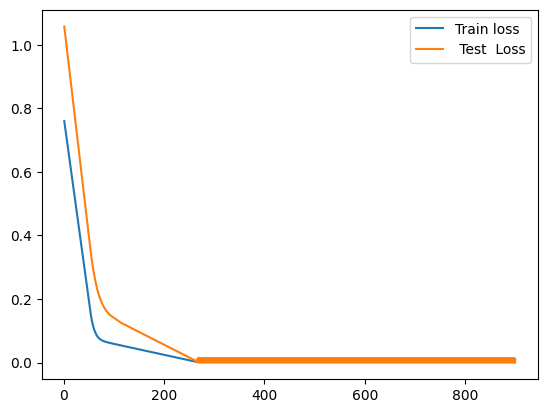

In [ ]:
import numpy as np
epochs_l  = [i for i in range(1 ,epochs+1)]
plt.plot(epochs_l , np.array(model_track['train_loss']) , label = 'Train loss')
plt.plot(epochs_l , model_track['test_loss'] , label = ' Test  Loss')
plt.legend()


OrderedDict([('weights', tensor([0.7059])), ('bias', tensor([0.2947]))])


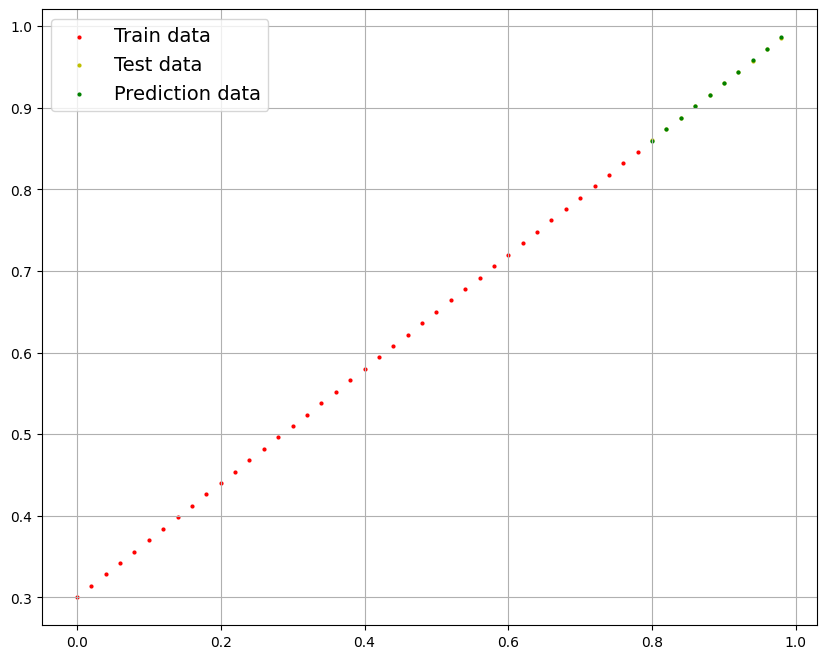

In [ ]:
print(model_0.state_dict())
with torch.inference_mode():
  y_pred = model_0(X_test)

plot_data((X_train , y_train),test_data = (X_test , y_test) ,prediction_data= (X_test , y_pred))

#### ***Saving the model***

In [ ]:
#### saving the weights
torch.save(model_track['best'].eval().state_dict() , 'best.pt')

## load the weighs
new_model_weights = torch.load('best.pt')

### recreate the model instance
Model = LinearRegressionModel()

### assign the weights

Model.load_state_dict(new_model_weights)
Model.eval()

Model.state_dict()

OrderedDict([('weights', tensor([0.7059])), ('bias', tensor([0.2947]))])

In [ ]:
#### Saving the entire model

torch.save(Model , 'Model.pt')

In [ ]:
### loading it
model_1 = torch.load("/content/Model.pt")

model_1.eval()

model_1.state_dict()

OrderedDict([('weights', tensor([0.7059])), ('bias', tensor([0.2947]))])

In [ ]:
### saving entire Model takes larger sapce that than saving the state dict
import os
print(os.path.getsize('best.pt'))
print("")
print(os.path.getsize('Model.pt'))

1478
2060


In [ ]:
#### Proper saving convention
from pathlib import Path

MODEL_DIR = Path('models')
MODEL_DIR.mkdir(parents = True , exist_ok = True)

MODEL_NAME = '01_pythorch_workfow_1.pt'
MODEL_PATH = MODEL_DIR / MODEL_NAME
torch.save(model_track['best'].eval().state_dict() , MODEL_PATH)


In [ ]:
### Loading
new_model = LinearRegressionModel()

model_weights = torch.load(MODEL_PATH)

new_model.load_state_dict(model_weights)

new_model.eval()




LinearRegressionModel()

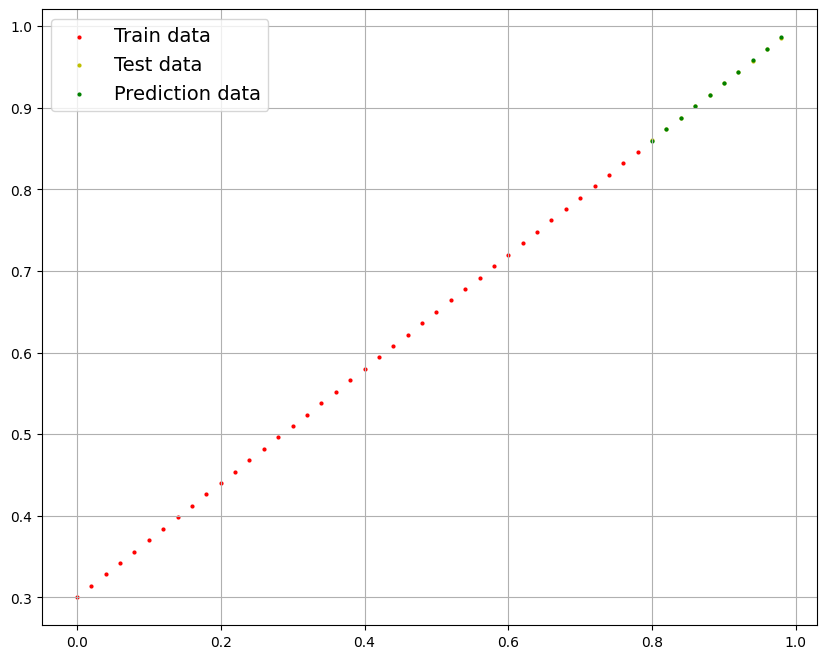

In [ ]:
### Testing the loded model

with torch.inference_mode():
  y_preds = new_model(X_test)

plot_data((X_train , y_train) ,(X_test ,y_test) ,(X_test , y_pred) )

#### *** HAVING SOME FUN***

In [ ]:

import copy


class FullModel(LinearRegressionModel):
  def __int__(self):
    super().__init__(self)

  def train(self , train_data , test_data ,num_epochs):

    X_train , y_train = train_data
    X_test , y_test = test_data

    model = LinearRegressionModel()
    loss_fn =  torch.nn.L1Loss()
    optim = torch.optim.SGD(lr = 0.01 , params = model.parameters())


    model_data = {}

    for epoch in range(1 , num_epochs+1):

      model.train()

      y_pred = model(X_train)

      loss = loss_fn(y_pred , y_train)

      optim.zero_grad()

      loss.backward()

      optim.step()

      model.eval()

      with torch.inference_mode():
        y_pred_test = model(X_test)

      test_loss = loss_fn(y_pred_test , y_test)

      if epoch == 1:
        model_data['test_loss'] = [test_loss.cpu()]
        model_data["train_loss"] = [loss.detach().cpu()]
        model_data['best_model'] = (copy.deepcopy(model))
        model_data['min_epoch'] = epoch

      elif test_loss.cpu() <  min(model_data['test_loss']):
        model_data['best_model'] = (copy.deepcopy(model))
        model_data['min_epoch'] = epoch

      model_data['test_loss'].append(test_loss)
      model_data['train_loss'].append((loss.detach().cpu()))

      if epoch % 50 == 0:
        info = "At Epoch {} || Last best Epoch {} | Min Loss  | {}".format(epoch , model_data['min_epoch'],
                                                                            min(model_data['test_loss'])
                                                                           )
        print(info)

    self.trained_model_weights =  model_data['best_model']

    return model_data


model_2 = FullModel()






In [ ]:
import inspect

In [ ]:
print(inspect.getsource(d))

# Ultralytics YOLO 🚀, AGPL-3.0 license

__version__ = "8.1.14"

from ultralytics.data.explorer.explorer import Explorer
from ultralytics.models import RTDETR, SAM, YOLO, YOLOWorld
from ultralytics.models.fastsam import FastSAM
from ultralytics.models.nas import NAS
from ultralytics.utils import ASSETS, SETTINGS as settings
from ultralytics.utils.checks import check_yolo as checks
from ultralytics.utils.downloads import download

__all__ = (
    "__version__",
    "ASSETS",
    "YOLO",
    "YOLOWorld",
    "NAS",
    "SAM",
    "FastSAM",
    "RTDETR",
    "checks",
    "download",
    "settings",
    "Explorer",
)



In [ ]:
def y(x):
  return torch.tensor(x**2 + 3*x +4)
size = 100
x =np.random.randint(-1 , 1 , size= 7000)
x = x.astype(np.float32)


In [ ]:
max(x)

0.0

In [ ]:
data = np.array( [(i , y(i)) for i in x] )
data = torch.from_numpy(data)

X_train = (data[:6000,0])
y_train = (data[:6000,1])

X_test =  (data[6000:,0])
y_test = (data[6000:,1])

model_2 = FullModel()
res = model_2.train(train_data=(X_train , y_train),
                    test_data = (X_test , y_test),
                    num_epochs = 5000
)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([6000])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


At Epoch 50 || Last best Epoch 5 | Min Loss  | 1.0143414268493651
At Epoch 100 || Last best Epoch 5 | Min Loss  | 1.0143414268493651
At Epoch 150 || Last best Epoch 5 | Min Loss  | 1.0143414268493651
At Epoch 200 || Last best Epoch 151 | Min Loss  | 1.0135538368225097
At Epoch 250 || Last best Epoch 151 | Min Loss  | 1.0135538368225097
At Epoch 300 || Last best Epoch 151 | Min Loss  | 1.0135538368225097
At Epoch 350 || Last best Epoch 151 | Min Loss  | 1.0135538368225097
At Epoch 400 || Last best Epoch 364 | Min Loss  | 1.0135503616333008
At Epoch 450 || Last best Epoch 364 | Min Loss  | 1.0135503616333008
At Epoch 500 || Last best Epoch 364 | Min Loss  | 1.0135503616333008
At Epoch 550 || Last best Epoch 364 | Min Loss  | 1.0135503616333008
At Epoch 600 || Last best Epoch 577 | Min Loss  | 1.013546890258789
At Epoch 650 || Last best Epoch 577 | Min Loss  | 1.013546890258789
At Epoch 700 || Last best Epoch 577 | Min Loss  | 1.013546890258789
At Epoch 750 || Last best Epoch 577 | Min Lo

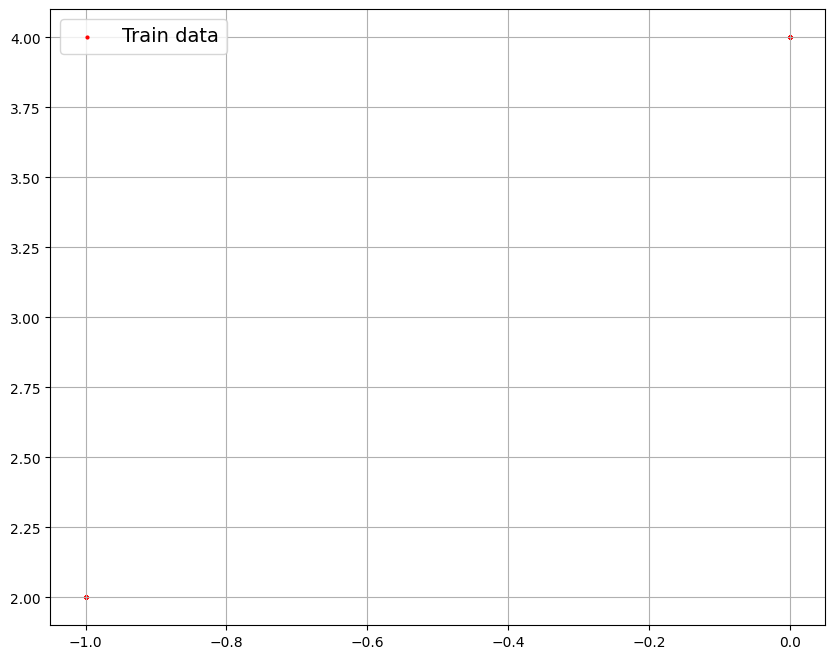

In [ ]:
plot_data((X_train,y_train))

In [ ]:
print(data[1] ,"\n\n" ,data[-1])

[[     1.3873]
 [     10.087]] 

 [[    -2.3962]
 [     2.5531]]


In [ ]:
print(X_train[1] , y_train[1] , '\n' , X_test[-1] , y_test[-1] )

[     1.3873] [     10.087] 
 [    -2.3962] [     2.5531]


In [ ]:
print(max(data[:,1]))

[     15.773]


In [ ]:
d[:8,0] , d[:8,1]

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([0, 1, 2, 3, 4, 5, 6, 7]))